## Transfer Learning resnet1252V2 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Dataset retrieved from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Library

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/AML/CNN/tomato/train'
valid_path = '/content/drive/My Drive/AML/CNN/tomato/val'

### Import VGG16 library

In [5]:
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 2s 0us/step


In [6]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/AML/CNN/tomato/train/*')

In [8]:
# Flatten the Input
x = Flatten()(resnet152V2.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
# Complie the Model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/AML/CNN/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/AML/CNN/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 984 images belonging to 10 classes.


In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
313/313 [==============================] - 156s 499ms/step - loss: 0.8482 - accuracy: 0.9666 - val_loss: 5.1793 - val_accuracy: 0.9035
Epoch 2/40
313/313 [==============================] - 154s 493ms/step - loss: 0.8179 - accuracy: 0.9680 - val_loss: 5.9154 - val_accuracy: 0.8933
Epoch 3/40
313/313 [==============================] - 154s 492ms/step - loss: 0.7263 - accuracy: 0.9726 - val_loss: 5.5574 - val_accuracy: 0.8872
Epoch 4/40
313/313 [==============================] - 153s 490ms/step - loss: 0.7980 - accuracy: 0.9701 - val_loss: 7.6711 - val_accuracy: 0.8720
Epoch 5/40
313/313 [==============================] - 154s 491ms/step - loss: 0.7968 - accuracy: 0.9720 - val_loss: 5.4913 - val_accuracy: 0.8984
Epoch 6/40
313/313 [==============================] - 153s 488ms/step - loss: 0.7334 - accuracy: 0.9760 - val_loss: 5.4995 - val_accuracy: 0.8974
Epoch 7/40
313/313 [==============================] - 151s 481ms/step - loss: 0.8723 - accuracy: 0.9708 - val_loss: 7.4994 -

### Plot

In [17]:
import matplotlib.pyplot as plt

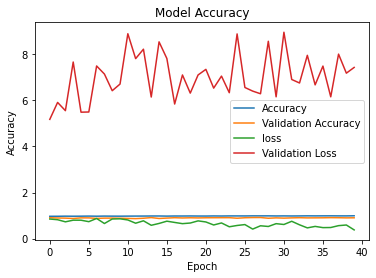

In [18]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Testing

#### Example 1

Tomato - Bacterial Spot


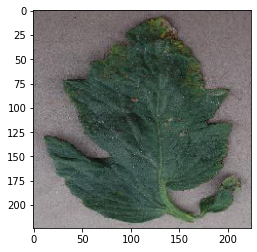

In [19]:
#Example 1

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/AML/CNN/tomato/val/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

preds = np.argmax(preds, axis=1)

if preds==0:
  print("Tomato - Bacterial Spot")
elif preds==1:
  print("Tomato - Early Blight")
elif preds==2:
  print("Tomato - Late Blight")
elif preds==3:
  print("Tomato - Leaf Mold")
elif preds==4:
  print("Tomato - Septoria Leaf Spot")
elif preds==5:
  print("Tomato - Spider Mites Two-spotted Spider Mite")
elif preds==6:
  print("Tomato - Target Spot")
elif preds==7:
  print("Tomato - Tomato_Yellow_Leaf_Curl_Virus")
elif preds==8:
  print("Tomato - Tomato Mosaic Virus")
else:
  print("Tomato - Healthy ")

### Example 2

Tomato - Leaf Mold


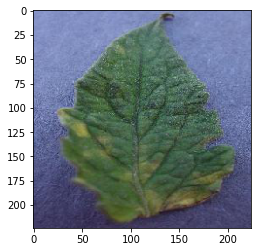

In [20]:
#Example 2

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/AML/CNN/tomato/val/Tomato___Leaf_Mold/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.JPG', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

preds = np.argmax(preds, axis=1)

if preds==0:
  print("Tomato - Bacterial Spot")
elif preds==1:
  print("Tomato - Early Blight")
elif preds==2:
  print("Tomato - Late Blight")
elif preds==3:
  print("Tomato - Leaf Mold")
elif preds==4:
  print("Tomato - Septoria Leaf Spot")
elif preds==5:
  print("Tomato - Spider Mites Two-spotted Spider Mite")
elif preds==6:
  print("Tomato - Target Spot")
elif preds==7:
  print("Tomato - Tomato_Yellow_Leaf_Curl_Virus")
elif preds==8:
  print("Tomato - Tomato Mosaic Virus")
else:
  print("Tomato - Healthy ")